<a href="https://colab.research.google.com/github/durga46/-Explicit-Intents/blob/main/exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape


(60000, 28, 28)

In [4]:
X_test.shape


(10000, 28, 28)

In [110]:
single_image= X_train[3000]


In [111]:
single_image.shape


(28, 28)

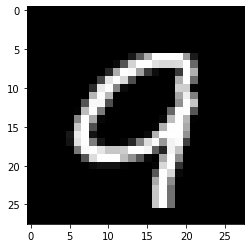

In [112]:
plt.imshow(single_image,cmap='gray')


In [113]:
y_train.shape


(60000,)

In [114]:
y_train[3000]

9

In [115]:
X_train.min()


0

In [116]:
X_train.max()


255

In [117]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


In [118]:
X_train_scaled.min()


0.0

In [119]:
X_train_scaled.max()

1.0

In [120]:
y_train[0]


5

In [121]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [122]:
type(y_train_onehot)


numpy.ndarray

In [123]:
y_train_onehot.shape

(60000, 10)

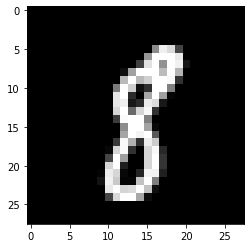

In [124]:
single_image = X_train[300]
plt.imshow(single_image,cmap='gray')

In [125]:
y_train_onehot[300]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [126]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [127]:
X_train_scaled.shape

(60000, 28, 28, 1)

In [130]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))



In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [134]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=50,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/50
938/938 [==============================] - 28s 30ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0573 - val_accuracy: 0.9847
Epoch 2/50
938/938 [==============================] - 28s 30ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0569 - val_accuracy: 0.9848
Epoch 3/50
938/938 [==============================] - 28s 30ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0640 - val_accuracy: 0.9845
Epoch 4/50
938/938 [==============================] - 28s 30ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0593 - val_accuracy: 0.9847
Epoch 5/50
938/938 [==============================] - 29s 31ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0717 - val_accuracy: 0.9840
Epoch 6/50
938/938 [==============================] - 28s 30ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0768 - val_accuracy: 0.9831
Epoch 7/50
938/938 [==============================] - 28s 30ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0756 - val_accuracy:

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()


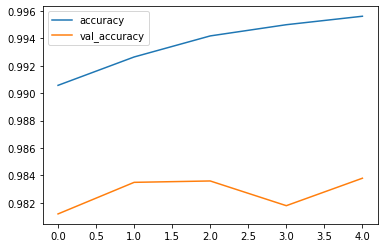

In [140]:
metrics[['accuracy','val_accuracy']].plot()


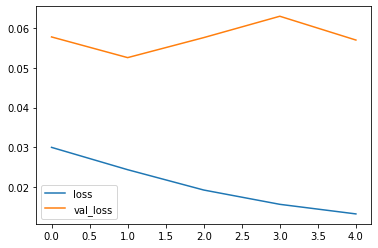

In [141]:
metrics[['loss','val_loss']].plot()


In [142]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


In [143]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 970    1    2    1    1    1    3    0    1    0]
 [   0 1127    3    1    0    1    1    1    1    0]
 [   2    4 1016    1    2    0    1    4    2    0]
 [   0    0    2 1003    0    3    0    0    2    0]
 [   0    0    1    0  972    0    2    0    1    6]
 [   1    0    1   14    0  872    3    1    0    0]
 [   6    1    0    0    3    3  942    0    3    0]
 [   0    1    7    3    0    0    0 1014    1    2]
 [   5    0    6    6    2    2    1    4  944    4]
 [   1    1    1    6   10    2    0    8    2  978]]


In [144]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [159]:
img = image.load_img('num1.jpeg')


In [160]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [161]:
img = image.load_img('num1.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [162]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [163]:

print(x_single_prediction)

[7]


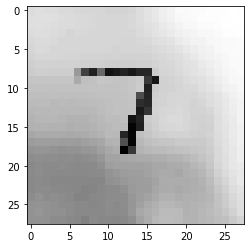

In [164]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [165]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [166]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [167]:
print(x_single_prediction)

[3]
